# Imports

If you do not have the following libraries already installed on your pc, uncomment and run the following block of code.

In [1]:
# ! pip install qiskit
# ! pip install numpy

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import numpy as np

Entangler Circuit

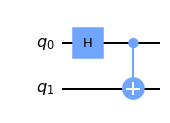

In [2]:
ent_qc=QuantumCircuit(2)
ent_qc.h(0)
ent_qc.cx(0,1)  # params = (Controll Qubit, Target Qubit)
ent_qc.draw('mpl')

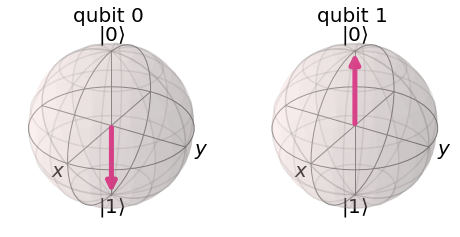

In [8]:
initial_state = Statevector.from_label('01')
plot_bloch_multivector(initial_state)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


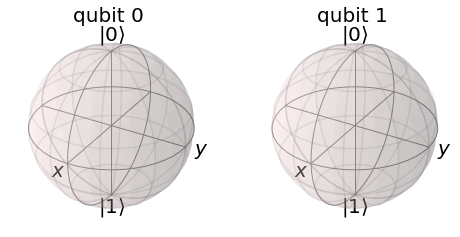

In [10]:
evolved_state = initial_state.evolve(ent_qc)
print(evolved_state)
plot_bloch_multivector(evolved_state)

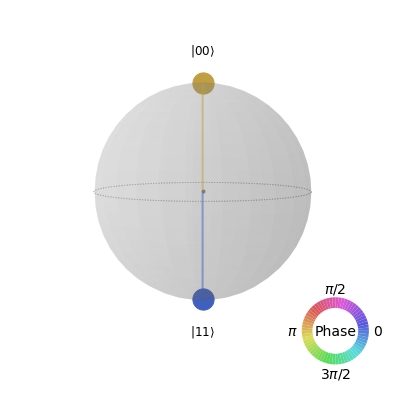

In [9]:
plot_state_qsphere(evolved_state)

Now lets take a look at sequences of gates and marked states

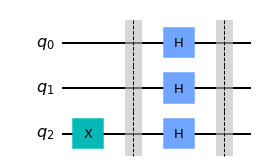

In [38]:
# Starting with Unifrom Superposition Initialization
quantum_register = 3

us_qc=QuantumCircuit(quantum_register)

us_qc.x(quantum_register-1)

us_qc.barrier()

for i in range(quantum_register):
    us_qc.h(i)

us_qc.barrier()

us_qc.draw('mpl')

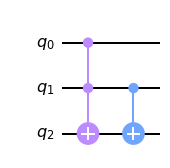

In [40]:
# Toffoli gate and a CNOT gate

mark_qc=QuantumCircuit(quantum_register)

mark_qc.ccx(0,1,2)  # params = (Controll Qubit, Controll Qubit, Target Qubit)

mark_qc.cx(1,2)

mark_qc.draw('mpl')

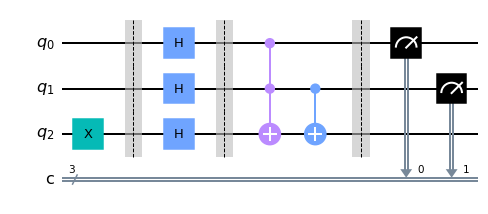

In [54]:
full_qc=QuantumCircuit(quantum_register, quantum_register)

full_qc.compose(us_qc, inplace=True)
full_qc.compose(mark_qc, inplace=True)

full_qc.barrier()

for i in range(quantum_register-1):
    full_qc.measure(i,i)

full_qc.draw('mpl')

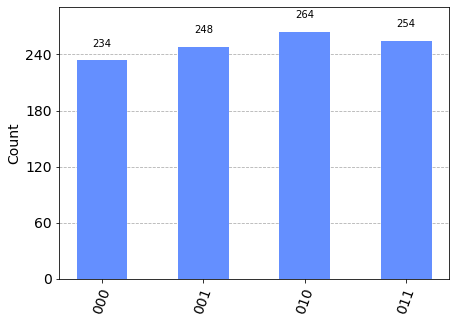

In [56]:
backend=Aer.get_backend('qasm_simulator')
counts = execute(full_qc,backend, shots = 1000).result().get_counts()
plot_histogram(counts)

Multi Qubit Gates

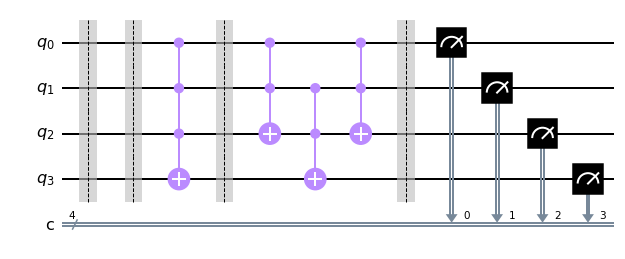

In [70]:
multi_qc=QuantumCircuit(4, 4)

multi_qc.barrier()

#multi_qc.x()

multi_qc.barrier()

multi_qc.mcx([0,1,2],3)

multi_qc.barrier()

multi_qc.ccx(0,1,2) 
multi_qc.ccx(1,2,3) 
multi_qc.ccx(0,1,2) 

multi_qc.barrier()

for i in range(4):
    multi_qc.measure(i,i)
    
multi_qc.draw('mpl')

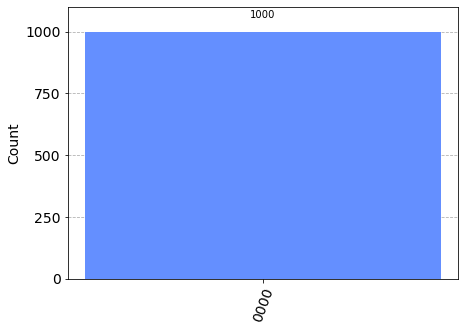

In [71]:
backend=Aer.get_backend('qasm_simulator')
counts = execute(multi_qc,backend, shots = 1000).result().get_counts()
plot_histogram(counts)